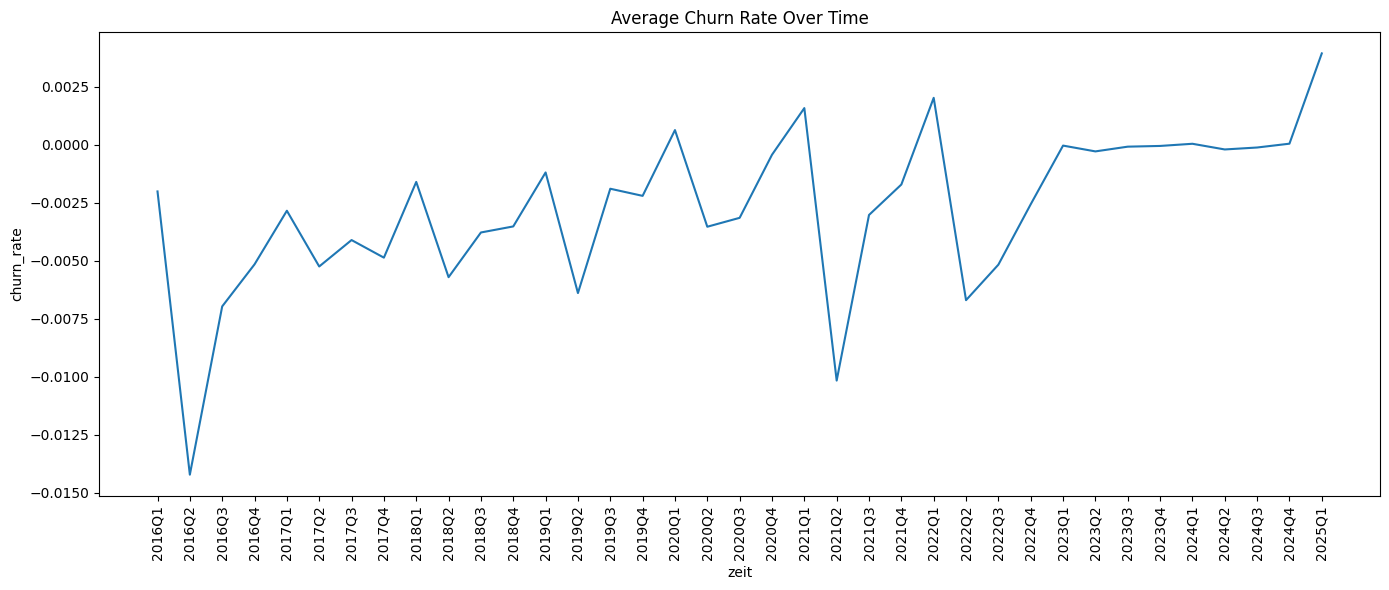

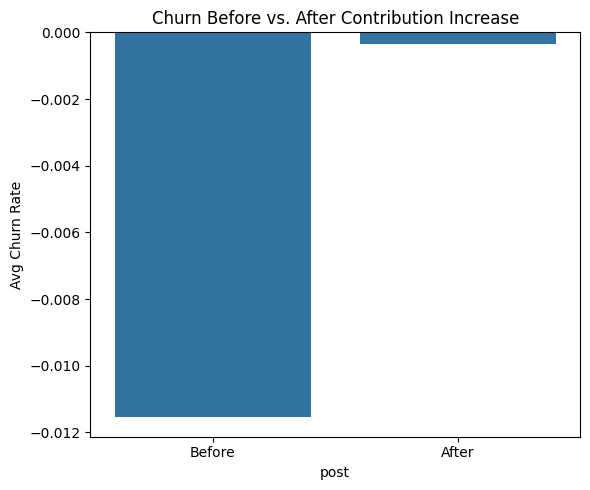

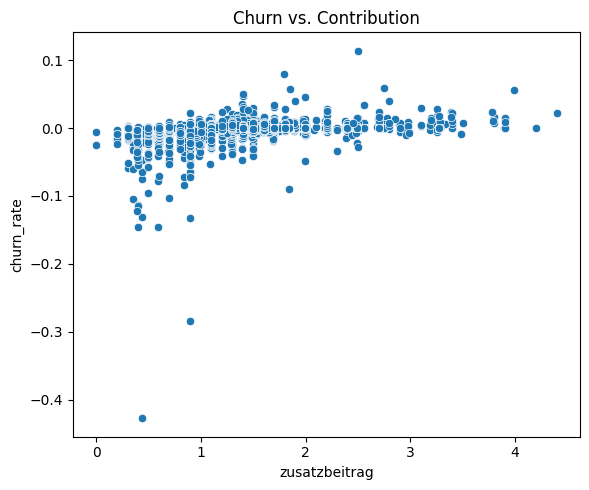

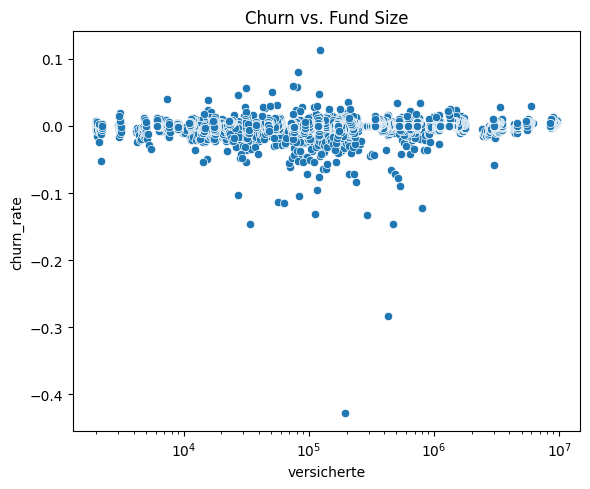

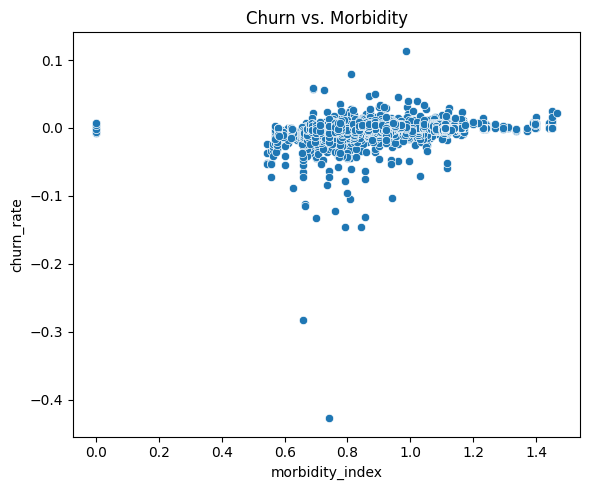

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and avoid dtype warnings
df = pd.read_csv("../../data/processed/merged_panel_clean_data.csv", low_memory=False)

# Drop rows with missing essential values used in plots
required_columns = ["jahr", "quartal", "churn_rate", "morbidity_index", "versicherte", "zusatzbeitrag", "kasse_clean", "treatment_flag"]
df = df.dropna(subset=required_columns)

# Convert types safely
df["jahr"] = df["jahr"].astype(int)
df["quartal"] = df["quartal"].astype(int)
df["zeit"] = df["jahr"].astype(str) + "Q" + df["quartal"].astype(str)
df["zeit"] = df["zeit"].astype(str)
df["kasse_clean"] = df["kasse_clean"].astype(str)

# Force numeric conversion (handle any stray non-numerics or strings)
numeric_cols = ["churn_rate", "morbidity_index", "versicherte", "zusatzbeitrag"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where any plotting-critical values became NaN after coercion
df = df.dropna(subset=numeric_cols)

# Plot churn trend over time
def plot_churn_over_time():
    trend = df.groupby("zeit")["churn_rate"].mean().reset_index()
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=trend, x="zeit", y="churn_rate")
    plt.xticks(rotation=90)
    plt.title("Average Churn Rate Over Time")
    plt.tight_layout()
    plt.show()

# Churn before vs after treatment
def plot_churn_pre_post():
    df["post"] = df.groupby("kasse_clean")["treatment_flag"].transform(lambda x: x.cumsum() > 0)
    avg_churn = df.groupby("post")["churn_rate"].mean().reset_index()
    plt.figure(figsize=(6, 5))
    sns.barplot(data=avg_churn, x="post", y="churn_rate")
    plt.xticks([0, 1], ["Before", "After"])
    plt.title("Churn Before vs. After Contribution Increase")
    plt.ylabel("Avg Churn Rate")
    plt.tight_layout()
    plt.show()

# Churn by increase size, fund size, morbidity
def churn_correlations():
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x="zusatzbeitrag", y="churn_rate")
    plt.title("Churn vs. Contribution")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x="versicherte", y="churn_rate")
    plt.xscale("log")
    plt.title("Churn vs. Fund Size")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x="morbidity_index", y="churn_rate")
    plt.title("Churn vs. Morbidity")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_churn_over_time()
    plot_churn_pre_post()
    churn_correlations()